<div><center>" Logistic Regression on the famous IRIS dataset "<center> 
    - Mohamed Riaz (@racyriaz)
    </div>

# Hey there, Welcome!
#### In this notebook we shall solve a problem i.e to predict the species of the iris flower when given its length and width,  using Logistic  Regression model

Note: Logistic Regression is used to predict Categorical data (Eg. Which group do you belong? or answers Yes or NO type of Questions)

## Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

## Loading filepath of the dataset

In [2]:
df = pd.read_csv(r'C:/Users/riaz/learning/DATA/iris.csv')

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA with the iris dataFrame

<AxesSubplot:xlabel='species', ylabel='count'>

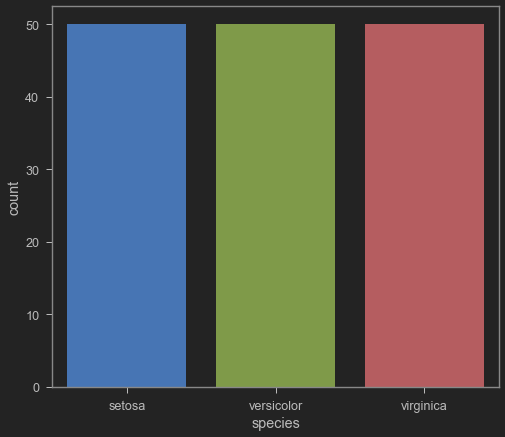

In [4]:
sns.countplot(df.species)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Distribution of Species with respect to their length and width

Using Violin plot from seaborn

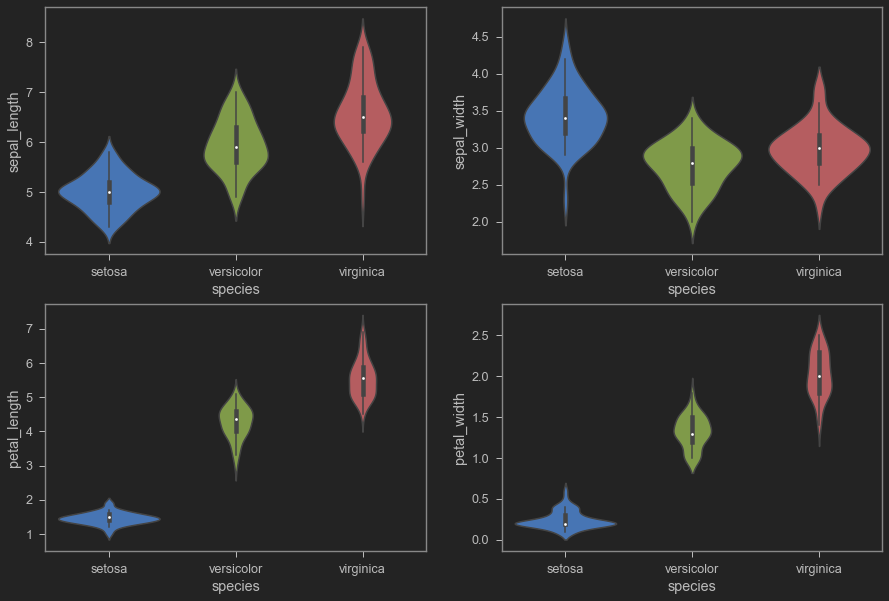

In [7]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
plt.figure(figsize=(15,10))
for n in features:
    plt.subplot(2,2,i)
    sns.violinplot(x='species',y=n,data=df)
    i+=1

Using swarmplot from seaborn

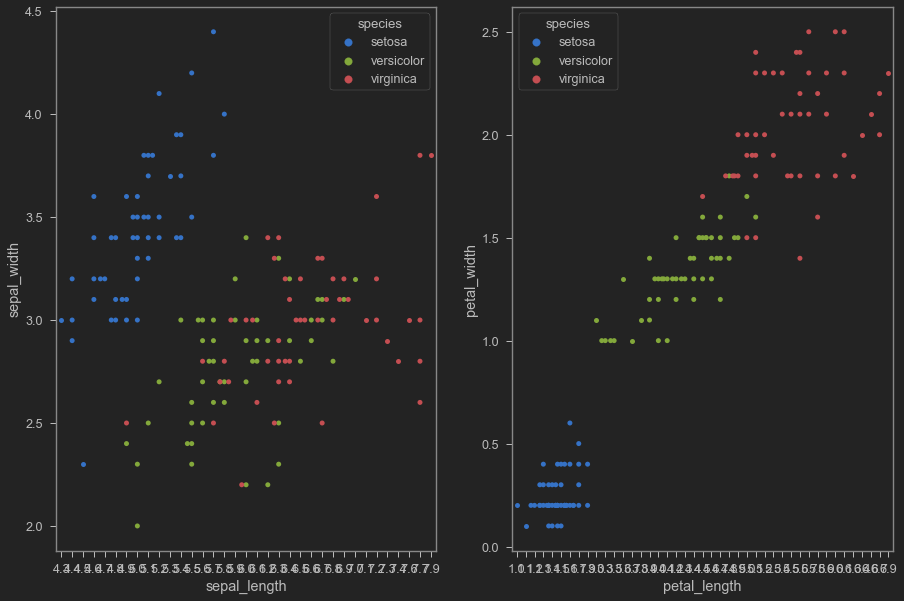

In [8]:
length = ['sepal_length','petal_length']
width =['sepal_width','petal_width']
i = 1
plt.figure(figsize=(15,10))
for n in zip(length,width):
    plt.subplot(1,2,i)
    sns.swarmplot(x=n[0],y=n[1],data=df,hue=df.species)
    i+=1


## Creating dummies for classes(mapping):

We do this mapping into a format the machines can understand and manipulate with  i.e. converting the species('Setosa','Versicolor','virginica') into integer ('0','1','2')

In [9]:
def classifier(data):
    if data == 'setosa':
        return 0
    elif data == 'versicolor':
        return 1
    else:
        return 2

df['result'] = df.species.apply(classifier)

## Forming the X( "given feature to the model") and y("value to be predicted")  term

In [10]:
X = df.drop(['species','result'],axis=1)
y = df.result

## Spliting the Data into Training set and Test set

Then transforming the data with Standard Scaler function

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Here we shall scale our data (i.e converting them into the range 0.0 and 1.0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building the Logistic Regression model

In [12]:
model = LogisticRegression(verbose=1)

In [13]:
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

Getting the predicted values from the y_test

In [14]:
predictions = model.predict(X_test_scaled)

In [15]:
y_test.shape

(50,)

### Lets plot the True values VS predicted values for easy visualisation

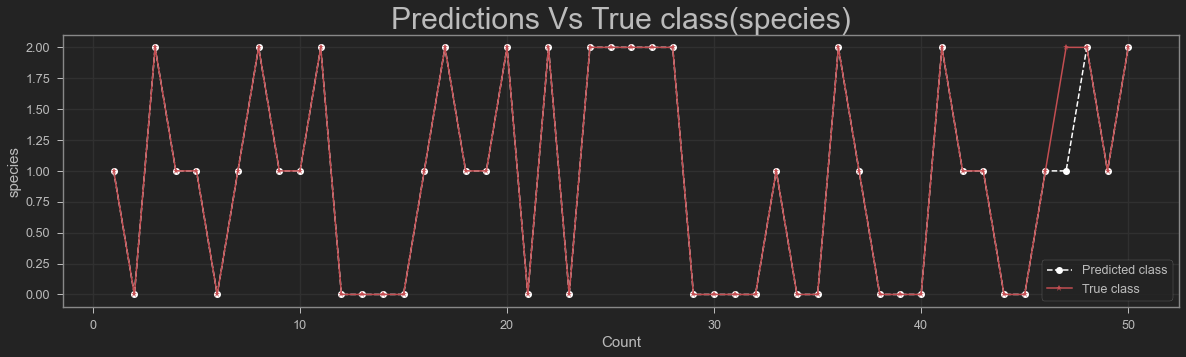

In [16]:
plt.figure(figsize=(20,5))
x = np.arange(1,51,1)
x1 = np.arange(1,51,5)
y = predictions
y1 = y_test
plt.plot(x,y,color='White',marker='o',label='Predicted class',linestyle='dashed')
plt.plot(x,y1,color='r',marker='*',label='True class')
plt.gca().legend(('Predicted class','True class'))
plt.xlabel('Count',fontsize=15)
plt.ylabel('species',fontsize=15)
plt.title('Predictions Vs True class(species)',fontsize=30)
plt.grid()
plt.ioff()

### Now lets get the metrics to see how well did our Logistic Regression model perform:

In [17]:
print('confusion_matrix : ')
print(confusion_matrix(predictions,y_test))
print('classification_report : ')
print(classification_report(predictions,y_test))

confusion_matrix : 
[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]
classification_report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### From the classification report printed above,  we can find that our model got an accuracy of about 98% which seems quite good!

# <div><center> If you did like it, Please do upvote to support!  Have a nice day <center>
    - Mohamed Riaz (@racyriaz)